<a href="https://www.kaggle.com/code/manvinagdev/physical-activity-prediction?scriptVersionId=138941879" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input/fisical-activity-dataset/dataset2.csv


## Loading the dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/fisical-activity-dataset/dataset2.csv')
dataset.head()

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 0].values
print(X)
print(y)

[[104.       30.        2.37223 ... -61.1888  -38.9599  -58.1438 ]
 [104.       30.        2.18837 ... -59.8479  -38.8919  -58.5253 ]
 [104.       30.        2.37357 ... -60.7361  -39.4138  -58.3999 ]
 ...
 [140.       30.8125   -9.42745 ... -38.5541  -16.0535   24.6936 ]
 [140.       30.8125   -9.47246 ... -38.8064  -16.04     24.9763 ]
 [140.       30.8125   -9.66621 ... -38.6814  -15.9175   24.9766 ]]
['transient activities' 'transient activities' 'transient activities' ...
 'transient activities' 'transient activities' 'transient activities']


## Encoding categorical data

['Nordic walking', 'ascending stairs', 'cycling', 'descending stairs', 'ironing', 'lying', 'rope jumping', 'running', 'sitting', 'standing', 'transient activities', 'vacuum cleaning', 'walking']
Counter({10: 927575, 12: 238761, 4: 238690, 5: 192523, 9: 189931, 0: 188107, 8: 185188, 11: 175353, 2: 164600, 1: 117216, 3: 104944, 7: 98199, 6: 42969})
Class=10, n=927575 (32.387%)
Class=5, n=192523 (6.722%)
Class=8, n=185188 (6.466%)
Class=9, n=189931 (6.632%)
Class=4, n=238690 (8.334%)
Class=11, n=175353 (6.123%)
Class=1, n=117216 (4.093%)
Class=3, n=104944 (3.664%)
Class=12, n=238761 (8.336%)
Class=0, n=188107 (6.568%)
Class=2, n=164600 (5.747%)
Class=7, n=98199 (3.429%)
Class=6, n=42969 (1.500%)


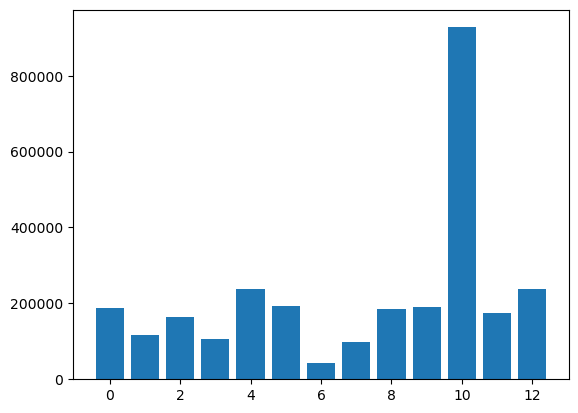

In [4]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

le = LabelEncoder()
y_temp = le.fit_transform(y)
print(list(le.classes_))
counter = Counter(y_temp)

print(counter)
for k,v in counter.items():
    per = v / len(y_temp) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Method 1: Using Random Forest Classifier 

## Handling missing values

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

## Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training RandomForestClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting Results

In [10]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4  4]
 [10 10]
 [ 8  8]
 ...
 [ 7  7]
 [ 8  8]
 [ 3  3]]


## Calculating Accuracy

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 37634      0      0      0      0      0      0      0      0      0
       8      0      0]
 [     0  23179      0     23      0      0      0      0      0      0
      81      0      0]
 [     0      0  32839      0      0      0      0      0      0      0
      21      0      0]
 [     0     14      0  20904      0      0      0      0      0      0
      43      0      0]
 [     0      0      0      0  47928      0      0      0      0     14
       6      0      0]
 [     0      0      0      0      0  38287      0      0      3      0
      17      0      0]
 [     0      0      1      0      0      0   8591      2      0      0
       5      0      0]
 [     0      0      0      0      0      0      0  19492      0      0
       8      1      0]
 [     0      0      0      0      0      0      0      0  36812      2
      32      0      0]
 [     0      0      0      0     22      0      0      0      4  38082
      57      0      0]
 [    28     61     12     57     25    

0.9986190931754223

In [12]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                                display_labels=classifier.classes_)
# disp.plot()
# plt.show()
import plotly.express as px
fig = px.imshow(cm, text_auto=True, aspect="auto")
fig.show()

Method 2: KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred=knn_clf.predict(X_test)

In [15]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4  4]
 [10 10]
 [ 8  8]
 ...
 [ 7  7]
 [ 8  8]
 [ 3  3]]


## Method 2: Using ANN

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Oversampling the minority classes

Class=4, n=741642 (7.692%)
Class=12, n=741642 (7.692%)
Class=10, n=741642 (7.692%)
Class=2, n=741642 (7.692%)
Class=9, n=741642 (7.692%)
Class=8, n=741642 (7.692%)
Class=0, n=741642 (7.692%)
Class=5, n=741642 (7.692%)
Class=1, n=741642 (7.692%)
Class=11, n=741642 (7.692%)
Class=6, n=741642 (7.692%)
Class=3, n=741642 (7.692%)
Class=7, n=741642 (7.692%)


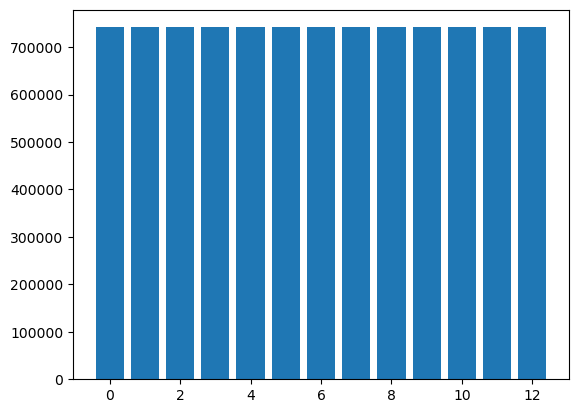

In [17]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
y_train = le.fit_transform(y_train)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=26, activation='tanh'))
ann.add(tf.keras.layers.Dense(units=52, activation='tanh'))
ann.add(tf.keras.layers.Dense(units=52, activation='tanh'))
ann.add(tf.keras.layers.Dense(units=13, activation='softmax'))

In [21]:
ann.compile(optimizer='adam' , loss='CategoricalCrossentropy' , metrics=['accuracy'])

In [22]:
history = ann.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
75324/75324 [==============================] - 145s 2ms/step - loss: 0.1724 - accuracy: 0.9415
Epoch 2/10
75324/75324 [==============================] - 142s 2ms/step - loss: 0.0763 - accuracy: 0.9731
Epoch 3/10
75324/75324 [==============================] - 144s 2ms/step - loss: 0.0601 - accuracy: 0.9788
Epoch 4/10
75324/75324 [==============================] - 151s 2ms/step - loss: 0.0527 - accuracy: 0.9815
Epoch 5/10
75324/75324 [==============================] - 142s 2ms/step - loss: 0.0480 - accuracy: 0.9831
Epoch 6/10
75324/75324 [==============================] - 143s 2ms/step - loss: 0.0452 - accuracy: 0.9840
Epoch 7/10
75324/75324 [==============================] - 146s 2ms/step - loss: 0.0432 - accuracy: 0.9848
Epoch 8/10
75324/75324 [==============================] - 141s 2ms/step - loss: 0.0417 - accuracy: 0.9854
Epoch 9/10
75324/75324 [==============================] - 148s 2ms/step - loss: 0.0405 - accuracy: 0.9857
Epoch 10/10
75324/75324 [=====================

In [23]:
y_pred = ann.predict(X_test)

17901/17901 [==============================] - 22s 1ms/step


In [24]:
result = np.argmax(y_pred, axis=-1)

In [25]:
print(result)

[ 4 10  8 ...  7  8  3]


In [26]:
y_test_rs = np.argmax(y_test, axis=-1)

In [27]:
print(y_test_rs)

9


In [28]:
y_pred_enc = pd.get_dummies(result)
y_test_enc = pd.get_dummies(y_test)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_enc, y_pred_enc))

0.9624047680565351
